### Import all the necessary modules for preprocessing the data


In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Import all the necessary modules for the model

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.
/home/kidist/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kidist/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kidist/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kidist/.local/lib/python3.7/site-packa

### Import all the necessary modules for visualizing  loss and accuracy

In [3]:
import matplotlib.pyplot as plt


### import the code that we need for L2 regularization and dropout:

In [4]:
from keras.layers import Dropout
from keras import regularizers

#  processing the data :
 - Read in the CSV (comma separated values) file and convert them to arrays.
 - Split our dataset into the input features and the label.
 - Scale the data so that the input features have similar orders of magnitude.
 - Split our dataset into the training set, the validation set and the test set.

### Read in the CSV (comma separated values) file 

In [5]:
dataset = pd.read_csv("housepricedata.csv")

In [6]:
# ! ls 
dataset.shape

(1460, 11)

In [7]:
dataset.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


### Convert the dataset to arrays. Arrays are a data format that our algorithm can process

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
df = dataset.values
type(df)

numpy.ndarray

In [10]:
df

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

### Split our dataset into the input features (which we call X) and the label (which we call Y).

In [11]:
# all the rows and the first 9th colums
X = df[:,0:10] 
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [12]:
# All rows of the 10th colums
Y = df[:,10]
Y
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

### Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
 * function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive:

In [13]:
min_max_scalar = preprocessing.MinMaxScaler()
X_scale = min_max_scalar.fit_transform(X)


In [14]:
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

### Split our dataset into the training set, the validation set and the test set. 

In [15]:
# val_and_test size will be 30% of the overall dataset. 
X_train,X_val_and_test,Y_train,Y_val_and_test = train_test_split(X_scale,Y, test_size = 0.3)

In [16]:
print("the total dataset shape = ",dataset.shape)
print("X_tarin=",X_train.shape)
print("X_val_and_test = ",X_val_and_test.shape)
print("Y_train =",Y_train.shape)
print("Y_val_and_test=",Y_val_and_test.shape)

the total dataset shape =  (1460, 11)
X_tarin= (1022, 10)
X_val_and_test =  (438, 10)
Y_train = (1022,)
Y_val_and_test= (438,)


###  we want a separate validation set and test set, we can use the same function to do the split again on test:

In [17]:
X_val,X_test,Y_val,Y_test = train_test_split(X_val_and_test,Y_val_and_test,test_size = 0.5)

In [18]:
print("X_val = " ,X_val.shape)
print("X_test = ", X_test.shape)
print("Y_val= " , Y_val.shape)
print("Y_test = " , Y_test.shape)

X_val =  (219, 10)
X_test =  (219, 10)
Y_val=  (219,)
Y_test =  (219,)


*  X_train (10 input features, 70% of full dataset)
*  X_val (10 input features, 15% of full dataset)
* X_test (10 input features, 15% of full dataset)
*  Y_train (1 label, 70% of full dataset)
*  Y_val (1 label, 15% of full dataset)
*  Y_test (1 label, 15% of full dataset)

# Building and Training our First Neural Network
Coding up our first neural network :

- specify the architecture with the Keras Sequential model.
- specify some of our settings (optimizer, loss function, metrics to track) with model.compile
- train our model (find the best parameters for our architecture) with the training data with model.fit
- evaluate our model on the test set with model.evaluate

#### Setting up the Architecture


<img src = "Image/NN.png" style="width:400px;height:300px;">


* Hidden layer 1: 32 neurons, ReLU activation
* Hidden layer 2: 32 neurons, ReLU activation
* Output Layer: 1 neuron, Sigmoid activation

In [19]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(10,)),
    Dense(32,activation='relu' ),
    Dense(1,activation='sigmoid')



])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              # track accuracy on top of the loss function. 
              metrics=['accuracy'])

In [22]:
hist  = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 321us/step - loss: 0.6694 - accuracy: 0.5098 - val_loss: 0.6613 - val_accuracy: 0.5434
Epoch 2/100
1022/1022 [==============================] - 0s 94us/step - loss: 0.6634 - accuracy: 0.5401 - val_loss: 0.6563 - val_accuracy: 0.5753
Epoch 3/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.6580 - accuracy: 0.6106 - val_loss: 0.6519 - val_accuracy: 0.6530
Epoch 4/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.6533 - accuracy: 0.6614 - val_loss: 0.6479 - val_accuracy: 0.7215
Epoch 5/100
1022/1022 [==============================] - 0s 100us/step - loss: 0.6489 - accuracy: 0.7182 - val_loss: 0.6440 - val_accuracy: 0.7763
Epoch 6/100
1022/1022 [==============================] - 0s 73us/step - loss: 0.6445 - accuracy: 0.7622 - val_loss: 0.6397 - val_accuracy: 0.7854
Epoch 7/100
1022/1022 [==============================] - 0s 77us/step - los

1022/1022 [==============================] - 0s 67us/step - loss: 0.3259 - accuracy: 0.8777 - val_loss: 0.3143 - val_accuracy: 0.8995
Epoch 57/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.3232 - accuracy: 0.8767 - val_loss: 0.3121 - val_accuracy: 0.9087
Epoch 58/100
1022/1022 [==============================] - 0s 93us/step - loss: 0.3209 - accuracy: 0.8777 - val_loss: 0.3083 - val_accuracy: 0.8950
Epoch 59/100
1022/1022 [==============================] - 0s 84us/step - loss: 0.3195 - accuracy: 0.8777 - val_loss: 0.3061 - val_accuracy: 0.9041
Epoch 60/100
1022/1022 [==============================] - 0s 67us/step - loss: 0.3175 - accuracy: 0.8777 - val_loss: 0.3035 - val_accuracy: 0.9041
Epoch 61/100
1022/1022 [==============================] - 0s 74us/step - loss: 0.3154 - accuracy: 0.8767 - val_loss: 0.3012 - val_accuracy: 0.9041
Epoch 62/100
1022/1022 [==============================] - 0s 69us/step - loss: 0.3138 - accuracy: 0.8777 - val_loss: 0.2992 - val_a

In [23]:
# show us loss and accuracy
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 43us/step


[0.3108458563889543, 0.8584474921226501]

In [24]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 44us/step


0.8584474921226501

# Visualizing Loss and Accuracy
##### the training loss and the validation loss.

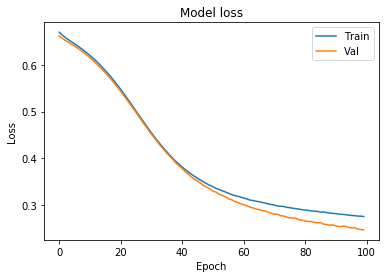

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

 ##### plot our training accuracy and validation accuracy with the code below:

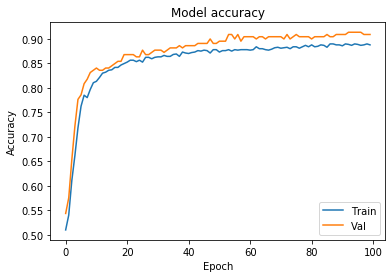

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

In [27]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [28]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4715 - accuracy: 0.7886 - val_loss: 0.3382 - val_accuracy: 0.8311
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3418 - accuracy: 0.8542 - val_loss: 0.2989 - val_accuracy: 0.8995
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3172 - accuracy: 0.8767 - val_loss: 0.2896 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3135 - accuracy: 0.8738 - val_loss: 0.3041 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2844 - accuracy: 0.8865 - val_loss: 0.2270 - val_accuracy: 0.9224
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2833 - accuracy: 0.8855 - val_loss: 0.2687 - val_accuracy: 0.8630
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2555

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1533 - accuracy: 0.9315 - val_loss: 0.2848 - val_accuracy: 0.9087
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1436 - accuracy: 0.9403 - val_loss: 0.2807 - val_accuracy: 0.9224
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.9452 - val_loss: 0.2858 - val_accuracy: 0.8995
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1321 - accuracy: 0.9472 - val_loss: 0.3261 - val_accuracy: 0.9178
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1385 - accuracy: 0.9432 - val_loss: 0.4843 - val_accuracy: 0.8950
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1745 - accuracy: 0.9276 - val_loss: 0.3002 - val_accuracy: 0.9132
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1636 - accuracy: 0.9325 - val_loss: 0.3600 -

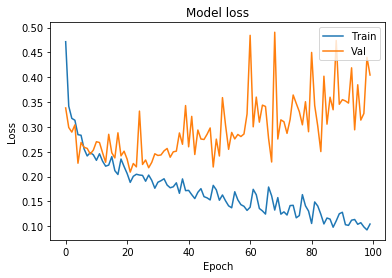

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

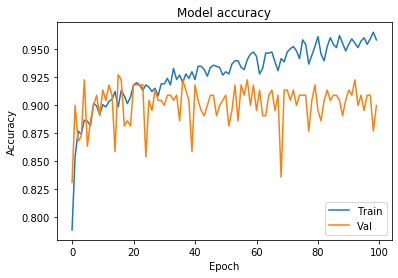

In [31]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## L2 regularization and dropout:

In [32]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [33]:
model_3.compile(optimizer = "adam",
                loss = "binary_crossentropy",
              
                metrics=['accuracy'])

                         


In [34]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.7332 - accuracy: 0.6252 - val_loss: 4.0659 - val_accuracy: 0.8356
Epoch 2/100
1022/1022 [==============================] - 3s 2ms/step - loss: 1.7472 - accuracy: 0.7935 - val_loss: 0.6789 - val_accuracy: 0.8402
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5774 - accuracy: 0.8591 - val_loss: 0.4746 - val_accuracy: 0.8995
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.8493 - val_loss: 0.4584 - val_accuracy: 0.8995
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4820 - accuracy: 0.8708 - val_loss: 0.4283 - val_accuracy: 0.9132
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4781 - accuracy: 0.8738 - val_loss: 0.4273 - val_accuracy: 0.8995
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.482

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4430 - accuracy: 0.8836 - val_loss: 0.3809 - val_accuracy: 0.9224
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4265 - accuracy: 0.8894 - val_loss: 0.3779 - val_accuracy: 0.9224
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4407 - accuracy: 0.8845 - val_loss: 0.3785 - val_accuracy: 0.9224
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4455 - accuracy: 0.8806 - val_loss: 0.4431 - val_accuracy: 0.8767
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4363 - accuracy: 0.8904 - val_loss: 0.3855 - val_accuracy: 0.9224
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4240 - accuracy: 0.8894 - val_loss: 0.3816 - val_accuracy: 0.8995
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4298 - accuracy: 0.8885 - val_loss: 0.4201 -

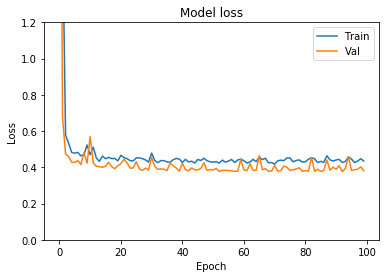

In [35]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

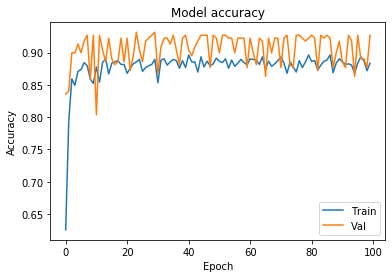

In [36]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

* Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.